In [1]:
%matplotlib inline
import os
from scipy.spatial import distance
os.chdir('/vco260/')

# collaborative filtering implemenation
1. the purpose of this notebook is to train a collaborative filtering models(different batch sizes and learning rates) on the uniprot id and go term id

### get_uniprot_colab_data function:
#### works on load raw gene data which merges ALL dataframes
##### loads cached result if not redo
1. column name - select column for collaborative filtering with the uniprot id ('go',pubmeb id, 
2. cut_off_col_per_idx - for go terms and uniprot id means at least x go terms per uniprot id(x=2 by default)
3. cut_off_idx_per_col - filter out go terms with less the x uniprot id related to them(x=2 by default)
4. redo - merges again using chosen column and new filter cut offs (does not redownload data)



In [2]:
from src.gene_collaborative_filtering import *
pd.options.display.max_colwidth=200

Using TensorFlow backend.


In [3]:
min_gene_per_go=5
min_go_per_gene = 2
df,codes=get_uniprot_colab_data('go',cut_off_col_per_idx=min_go_per_gene,cut_off_idx_per_col=min_gene_per_go,redo=False)
df=df.drop_duplicates()

/vco260/src/dataprocess.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  temp[feature]=temp[feature].astype(str).str.lstrip().str.rstrip()
/vco260/src/dataprocess.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  temp[feature]=temp[feature].str.split(split_on)
100%|██████████| 2/2 [00:00<00:00,  8.07it/s]


In [4]:
train_data=pd.read_parquet('data/train_data.parquet')
test_data=pd.read_parquet('data/test_data.parquet')
train_data=train_data[['Entry_categorical','go_categorical','target']]
test_data=test_data[['Entry_categorical','go_categorical','target']]
mydf=pd.read_csv('results/my_embedding_result.csv')
mydf=mydf[np.arange(300).astype(str).tolist()+['Entry_int','entry']]
myarray=mydf.values[:,:300]

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [9]:
std=mydf.std(axis=0)[:300].values

In [21]:
np.argsort(std)[::-1].tolist()

[293,
 205,
 299,
 132,
 266,
 101,
 223,
 230,
 286,
 99,
 22,
 151,
 148,
 191,
 235,
 48,
 250,
 178,
 1,
 160,
 3,
 88,
 267,
 153,
 115,
 298,
 61,
 119,
 58,
 243,
 87,
 105,
 164,
 194,
 201,
 127,
 155,
 137,
 145,
 103,
 282,
 116,
 96,
 251,
 198,
 218,
 255,
 224,
 43,
 39,
 280,
 260,
 36,
 42,
 183,
 106,
 275,
 44,
 202,
 245,
 113,
 133,
 63,
 281,
 13,
 136,
 9,
 134,
 138,
 68,
 142,
 162,
 246,
 6,
 124,
 184,
 26,
 227,
 236,
 80,
 67,
 14,
 171,
 200,
 228,
 47,
 259,
 78,
 33,
 31,
 65,
 256,
 287,
 7,
 186,
 187,
 57,
 258,
 62,
 5,
 241,
 112,
 157,
 226,
 285,
 204,
 292,
 229,
 21,
 169,
 8,
 195,
 263,
 274,
 233,
 219,
 268,
 117,
 289,
 279,
 81,
 190,
 120,
 49,
 110,
 248,
 2,
 261,
 25,
 28,
 79,
 72,
 131,
 102,
 24,
 20,
 156,
 222,
 265,
 55,
 98,
 192,
 104,
 52,
 152,
 64,
 16,
 34,
 10,
 182,
 84,
 71,
 203,
 54,
 221,
 146,
 173,
 161,
 242,
 225,
 85,
 276,
 46,
 262,
 231,
 237,
 74,
 56,
 150,
 166,
 17,
 51,
 38,
 123,
 73,
 249,
 288,
 126,
 1

In [24]:
mydf[['293','entry']].sort_values('293')

293       entry
79598  -42.743988      H9LFY0
41999  -42.666428      C0PDL3
69942  -42.576954  A0A1U8E121
45446  -40.614662  A0A1S3BWK2
5188   -39.601590  A0A178VBH7
12114  -38.773045  A0A0R4J2K9
35836  -38.268238      Q9M0D2
13934  -38.266020  A0A1U8GF57
85962  -38.089420  A0A1U8KY12
13293  -38.065820  A0A0A0LJZ8
48532  -37.988785      K7LPS9
4523   -37.494617  A0A0R0JVY2
6416   -37.397020      Q5VR96
41740  -37.357140      B6SVD8
83889  -37.348137  A0A178VQR2
99659  -37.331720  A0A1U8M725
61255  -37.138790      Q0WLB0
13629  -37.049255  A0A2G2Z5F7
83046  -36.997578      K4D4J0
93715  -36.901310      I1KNG9
13225  -36.796610  A0A0A0L877
71582  -36.729706      M1BEP2
9525   -36.590965  A0A1U8JYN4
16708  -36.523670      M1BH80
10245  -36.497646  A0A1U8IKN5
94121  -36.399982      K7KBW3
16031  -36.290230      B4FRG7
98579  -36.284122  A0A1U8J1U8
3831   -36.173440      Q39857
95912  -36.031940      M0ZWN2
...           ...         ...
61065   32.792713      Q9S826
22347   32.865050      I1MKC6
65385   32.901814  A0A1D6PU88
19317   33.291355      Q9LV91
2026    33.420880      Q9ZW18
32735   33.455334      Q941L3
15742   33.544765      F4JNY0
305     34.004740      K4CVS0
19540   34.296017      Q8H1D4
7649    34.347725      Q9LU93
26645   34.661594      I1LP96
21583   34.664284      K4ASR2
110315  34.820526      C6T9X4
40473   35.393810      Q9C9G6
97526   35.423813      Q851R2
107260  35.751663  A0A1U8GXH3
52740   35.960430      Q6Z6K3
23927   36.072110      I1LW70
6261    36.251976      A3AM33
105755  36.321910  A0A1S3CLD0
28891   36.606550  A0A1S3BKU5
58427   36.654232      Q94CF8
86638   37.421394      Q6Z4I1
81932   37.482850      Q84M92
7677    37.857395      F4K4E3
18693   39.315613      Q5NAX4
33332   40.156605      M0ZYC4
29334   41.267400      K7LKS3
115981  42.931816      K4BDD0
45125   44.268690  A0A1U8HLL2

[117256 rows x 2 columns]

In [26]:
merged=pd.read_parquet(load_raw_gene_data())
merged=merged.drop_duplicates(subset=['Entry'])
merged.index=merged.Entry
merged

Entry                      Gene names                    Organism  \
Entry                                                                        
P0CC51  P0CC51            ndhB2 ndhB-B CsCp125  Cucumis sativus (Cucumber)   
Q2QD38  Q2QD38                    ndhG CsCp108  Cucumis sativus (Cucumber)   
P42046  P42046               psaC frxA CsCp106  Cucumis sativus (Cucumber)   
Q2QD43  Q2QD43                            ndhF  Cucumis sativus (Cucumber)   
Q2QD89  Q2QD89                    psaA CsCp034  Cucumis sativus (Cucumber)   
P32869  P32869                            psaD  Cucumis sativus (Cucumber)   
P42066  P42066                             PCK  Cucumis sativus (Cucumber)   
Q4VZH0  Q4VZH0                    ndhC CsCp043  Cucumis sativus (Cucumber)   
Q4VZL8  Q4VZL8                    ndhD CsCp105  Cucumis sativus (Cucumber)   
Q2QD39  Q2QD39                    ndhE CsCp107  Cucumis sativus (Cucumber)   
P93115  P93115                            None  Cucumis sativus (Cucumber)   
Q2QD36  Q2QD36                    ndhA CsCp110  Cucumis sativus (Cucumber)   
P0CC50  P0CC50            ndhB1 ndhB-A CsCp088  Cucumis sativus (Cucumber)   
Q4VZH1  Q4VZH1                    ndhK CsCp042  Cucumis sativus (Cucumber)   
Q39639  Q39639                            None  Cucumis sativus (Cucumber)   
Q4VZL2  Q4VZL2                    ndhH CsCp111  Cucumis sativus (Cucumber)   
Q2QD70  Q2QD70                    petG CsCp059  Cucumis sativus (Cucumber)   
Q4VZP0  Q4VZP0                    petN CsCp020  Cucumis sativus (Cucumber)   
P46488  P46488                            MDHG  Cucumis sativus (Cucumber)   
Q2QD37  Q2QD37                    ndhI CsCp109  Cucumis sativus (Cucumber)   
Q4VZH2  Q4VZH2                    ndhJ CsCp041  Cucumis sativus (Cucumber)   
J9RYI6  J9RYI6                             DVR  Cucumis sativus (Cucumber)   
Q2QD41  Q2QD41                            ccsA  Cucumis sativus (Cucumber)   
Q2QD76  Q2QD76                    petA CsCp053  Cucumis sativus (Cucumber)   
Q4VZK3  Q4VZK3                    rpoA CsCp074  Cucumis sativus (Cucumber)   
Q4VZK9  Q4VZK9  rps7-A CsCp089; rps7-B CsCp124  Cucumis sativus (Cucumber)   
Q4VZK5  Q4VZK5  rpl2-A CsCp083; rpl2-B CsCp130  Cucumis sativus (Cucumber)   
Q4VZM8  Q4VZM8                   rps19 CsCp082  Cucumis sativus (Cucumber)   
Q4VZI2  Q4VZI2                    psaI CsCp050  Cucumis sativus (Cucumber)   
Q2QD69  Q2QD69                    psaJ CsCp062  Cucumis sativus (Cucumber)   
...        ...                             ...                         ...   
Q9FUN0  Q9FUN0                           HMT-1            Zea mays (Maize)   
Q9FUM8  Q9FUM8                           HMT-3            Zea mays (Maize)   
P26567  P26567                            clpP            Zea mays (Maize)   
K7VYZ9  K7VYZ9        COAC1 MCF2 GRMZM2G420119            Zea mays (Maize)   
P17344  P17344                            atpI            Zea mays (Maize)   
P00827  P00827                            atpB            Zea mays (Maize)   
Q8LPU5  Q8LPU5                          DMT105            Zea mays (Maize)   
B6TYV8  B6TYV8                            CNR2            Zea mays (Maize)   
B6SGC5  B6SGC5                            CNR6            Zea mays (Maize)   
D9HP23  D9HP23                            CNR7            Zea mays (Maize)   
D9HP25  D9HP25                            CNR9            Zea mays (Maize)   
P00835  P00835                            atpE            Zea mays (Maize)   
P05494  P05494                            ATPA            Zea mays (Maize)   
B6TZ45  B6TZ45                            CNR1            Zea mays (Maize)   
P48186  P48186                            atpF            Zea mays (Maize)   
P69449  P69449                            atpH            Zea mays (Maize)   
B4F8I5  B4F8I5        COAC2 MCF1 GRMZM2G161299            Zea mays (Maize)   
P0C1M0  P0C1M0                            None            Zea mays (Maize)   
B4F8Z1  B4F8Z1    ATP4 ZEAMMB73

In [36]:
res=pd.merge(merged[["Entry","gobp"]],mydf[['205','entry']],left_on='Entry',right_on='entry')

In [37]:
res.sort_values('205')

Entry  \
30541       I1LIC4   
71210       F4HP86   
36479       I1KT54   
62226       Q8L5V0   
79127       Q9SL56   
37251   A0A0R4J4A7   
9384    A0A1U8JS83   
23393       Q02920   
93979       Q0JNQ7   
79877       Q9SH30   
115620      B6SVW0   
43783   A0A1S3CK96   
70392   A0A178V1J3   
29600       K7MYR3   
95056       Q69UB8   
100824      Q8W314   
38276       C6T569   
89783       Q0JIL1   
30654       C6SWE0   
38312       I1MDA4   
20618   A0A1U8P7M4   
50805   A0A1U8GZR9   
23362       Q2PMN2   
64052       Q84ZT9   
86661       K4DBD1   
36819       K7LEQ9   
4597        Q2L961   
95767       Q5NAB6   
21464   A0A1U8NQ82   
78989       Q8W4P8   
...            ...   
79921       O48782   
107356      Q1W5S8   
65280       Q67YC0   
94849       Q6ZKF1   
63237       Q9FIF5   
93713       A3AM33   
31889       I1LVB2   
101264      Q06967   
36671       C6SZ62   
24376       C6TEY7   
72212       F4IP68   
70630   A0A1P8B956   
7360    A0A1U8NKU7   
801     A0A0A0KZI8   
30475       I1NCE6   
63286       O81439   
82526       K4BKU3   
109709      C0HGX9   
58984       Q9FN09   
78891       Q9C5J6   
105368      M1CZC7   
37406       I1LD94   
4282    A0A0A0K823   
70764       F4J246   
97563       Q6Z6K3   
33148       I1M8M9   
62122       Q8VXZ9   
117121  A0A1D6PU88   
113315  A0A1D6MZJ0   
91538       Q69KL9   

                                                                                                                                                                                                           gobp  \
30541   endoplasmic reticulum unfolded protein response [GO:0030968]; intrinsic apoptotic signaling pathway in response to endoplasmic reticulum stress [GO:0070059]; IRE1-mediated unfolded protein respons...   
71210   brassinosteroid biosynthetic process [GO:0016132]; brassinosteroid homeostasis [GO:0010268]; multicellular organism development [GO:0007275]; oxidation-reduction process [GO:0055114]; sterol metab...   
36479                                                                                                                                                                                                      None   
62226   maintenance of transcriptional fidelity during DNA-templated transcription elongation from RNA polymerase II promoter [GO:0001193]; mRNA cleavage [GO:0006379]; RNA-directed DNA methylation [GO:008...   
79127                                                                                                                               carbohydrate transport [GO:0008643]; phosphate ion homeostasis [GO:0055062]   
37251                                                                                                                                          glycine decarboxylation via glycine cleavage system [GO:0019464]   
9384                                                           multicellular organism development [GO:0007275]; protein ubiquitination [GO:0016567]; ubiquitin-dependent protein catabolic process [GO:0006511]   
23393                                                                                                                                                                                   nodulation [GO:0009877]   
93979                                                                                                                   protein quality control for misfolded or incompletely synthesized proteins [GO:0006515]   
79877                                                                                         copper ion transport [GO:0006825]; detoxification of copper ion [GO:0010273]; response to copper ion [GO:0046688]   
115620                                                                                                                                                                       protein glycosylation [GO:0006486]   
43783                                                                                                               

In [31]:
merged[['go','gobp','gomf']]

go  \
Entry                                                                                                                                                                                                             
P0CC51  chloroplast thylakoid membrane [GO:0009535]; integral component of membrane [GO:0016021]; NADH dehydrogenase (ubiquinone) activity [GO:0008137]; quinone binding [GO:0048038]; ATP synthesis coupled...   
Q2QD38                            chloroplast thylakoid membrane [GO:0009535]; integral component of membrane [GO:0016021]; NADH dehydrogenase (ubiquinone) activity [GO:0008137]; quinone binding [GO:0048038]   
P42046  chloroplast thylakoid membrane [GO:0009535]; photosystem I [GO:0009522]; 4 iron, 4 sulfur cluster binding [GO:0051539]; electron transfer activity [GO:0009055]; metal ion binding [GO:0046872]; pho...   
Q2QD43  chloroplast thylakoid membrane [GO:0009535]; integral component of membrane [GO:0016021]; NADH dehydrogenase (ubiquinone) activity [GO:0008137]; quinone binding [GO:0048038]; ATP synthesis coupled...   
Q2QD89  chloroplast thylakoid membrane [GO:0009535]; integral component of membrane [GO:0016021]; photosystem I [GO:0009522]; 4 iron, 4 sulfur cluster binding [GO:0051539]; chlorophyll binding [GO:0016168...   
P32869                                                                                     chloroplast thylakoid membrane [GO:0009535]; photosystem I reaction center [GO:0009538]; photosynthesis [GO:0015979]   
P42066                                                            cytoplasm [GO:0005737]; ATP binding [GO:0005524]; phosphoenolpyruvate carboxykinase (ATP) activity [GO:0004612]; gluconeogenesis [GO:0006094]   
Q4VZH0  chloroplast thylakoid membrane [GO:0009535]; integral component of membrane [GO:0016021]; NADH dehydrogenase (ubiquinone) activity [GO:0008137]; quinone binding [GO:0048038]; photosynthesis, light...   
Q4VZL8  chloroplast thylakoid membrane [GO:0009535]; integral component of membrane [GO:0016021]; NADH dehydrogenase (ubiquinone) activity [GO:0008137]; quinone binding [GO:0048038]; ATP synthesis coupled...   
Q2QD39  chloroplast thylakoid membrane [GO:0009535]; integral component of membrane [GO:0016021]; oxidoreductase activity, acting on NAD(P)H, quinone or similar compound as acceptor [GO:0016655]; quinone ...   
P93115                                                   chloroplast membrane [GO:0031969]; 1,2-diacylglycerol 3-beta-galactosyltransferase activity [GO:0046509]; glycolipid biosynthetic process [GO:0009247]   
Q2QD36  chloroplast thylakoid membrane [GO:0009535]; integral component of membrane [GO:0016021]; oxidoreductase activity, acting on NAD(P)H, quinone or similar compound as acceptor [GO:0016655]; quinone ...   
P0CC50  chloroplast thylakoid membrane [GO:0009535]; integral component of membrane [GO:0016021]; NADH dehydrogenase (ubiquinone) activity [GO:0008137]; quinone binding [GO:0048038]; ATP synthesis coupled...   
Q4VZH1  chloroplast thylakoid membrane [GO:0009535]; 4 iron, 4 sulfur cluster binding [GO:0051539]; iron ion binding [GO:0005506]; NADH dehydrogenase (ubiquinone) activity [GO:0008137]; quinone binding [G...   
Q39639  chloroplast stroma [GO:0009570]; glycerol-3-phosphate O-acyltransferase activity [GO:0004366]; sn-1-glycerol-3-phosphate C16:0-DCA-CoA acyl transferase activity [GO:0102420]; CDP-diacylglycerol bi...   
Q4VZL2  chloroplast thylakoid membrane [GO:0009535]; NAD binding [GO:0051287]; oxidoreductase activity, acting on NAD(P)H, quinone or similar compound as acceptor [GO:0016655]; quinone binding [GO:0048038...   
Q2QD70  chloroplast thylakoid membrane [GO:0009535]; cytochrome b6f complex [GO:0009512]; integral component of membrane [GO:0016021]; electron transporter, transferring electrons within cytochrome b6/f c...   
Q4VZP0  chloroplast thylakoid membrane [GO:0009535]; cytochrome b6f complex [GO:0009512]; integral component of membrane [GO:0016021]; electron transporter, transferring electrons within cytochrom

In [69]:
from sklearn.decomposition import PCA
res=[]
for j in tqdm(np.arange(5,200,5)):
    pca=PCA(n_components=j).fit(mydf.values[:,0:300])
    res.append({'x':j,'y':sum(pca.explained_variance_ratio_)})

100%|██████████| 39/39 [03:20<00:00,  7.61s/it]


In [77]:
df=pd.DataFrame(res)

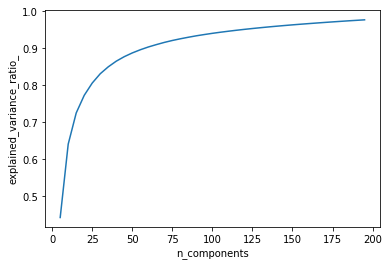

In [78]:
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.plot(df['x'],df['y'])